In [1]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyzer = SentimentIntensityAnalyzer()

In [3]:
File = pd.read_csv('Reddit_Comments.csv')

In [4]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

In [5]:
File.head()

,Unnamed: 0,ico,comment,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,tezos,Market is already recovering.,,,,,,
1,1,tezos,"Please, don't mistake an obvious inability to ...",,,,,,
2,2,tezos,This is friggin authoritarian china. They will...,,,,,,
3,3,tezos,Watch this 'old' video on bitcoin a couple of ...,,,,,,
4,4,tezos,"Well, the Foundation is going out and putting ...",,,,,,


In [6]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['comment']
    print(sentence)
    blob = TextBlob(sentence)
    print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['comment'])["compound"]
    pos = analyzer.polarity_scores(row['comment'])["pos"]
    neu = analyzer.polarity_scores(row['comment'])["neu"]
    neg = analyzer.polarity_scores(row['comment'])["neg"]
    print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


Market is already recovering.
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
Please, don't mistake an obvious inability to properly communicate for a "strategy".

EDIT: Hoplite phalanx is outdated by about 2 thousand years, maybe more.
Nice analogy.
Polarity:  0.13999999999999999 Subjectivity:  0.5466666666666666
Compound:  0.576 Positivity:  0.247 Neutral:  0.664 Negative:  0.09
This is friggin authoritarian china. They will do whatever they want. Party members are all corrupt. 
Polarity:  -0.5 Subjectivity:  1.0
Compound:  0.4588 Positivity:  0.222 Neutral:  0.778 Negative:  0.0
Watch this 'old' video on bitcoin a couple of times and you will be a lot wiser: https://youtu.be/GP_eT6E4os8


Polarity:  0.1 Subjectivity:  0.2
Compound:  0.296 Positivity:  0.128 Neutral:  0.872 Negative:  0.0
Well, the Foundation is going out and putting a Hoplite Phalanx together.
First the trumpet, then the charge!

A slow, concerted communications strateg

In [7]:
File.head()

,Unnamed: 0,ico,comment,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,tezos,Market is already recovering.,0,0,1,0,0,0
1,1,tezos,"Please, don't mistake an obvious inability to ...",0.576,0.247,0.664,0.09,0.14,0.546667
2,2,tezos,This is friggin authoritarian china. They will...,0.4588,0.222,0.778,0,-0.5,1
3,3,tezos,Watch this 'old' video on bitcoin a couple of ...,0.296,0.128,0.872,0,0.1,0.2
4,4,tezos,"Well, the Foundation is going out and putting ...",0.3382,0.064,0.936,0,-0.0375,0.373333


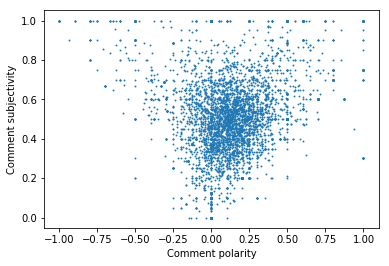

In [8]:
plt.scatter(File['Polarity'], File['Subjectivity'], s=0.8)
plt.xlabel('Comment polarity')
plt.ylabel('Comment subjectivity')
# plt.xlim(-1.1, 1.1)
# plt.ylim(-0.1, 1.1)
plt.show()

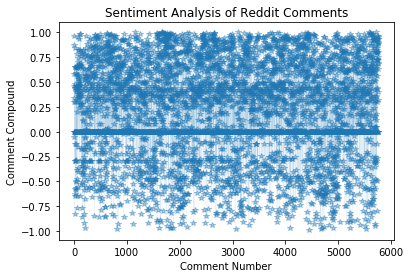

In [9]:
# Create plot
plt.plot(np.arange(len(File["Compound"])),
         File["Compound"], marker="*", linewidth=0.1,
         alpha=0.4)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Reddit Comments")
plt.ylabel("Comment Compound")
plt.xlabel("Comment Number")
plt.show()

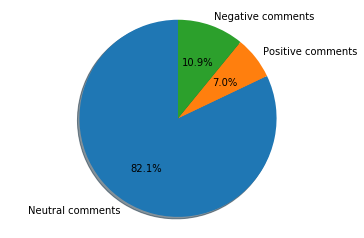

In [10]:
positive_polarity = [p for p in File['Postivity'] if p>0.5]
negative_polarity = [n for n in File['Negativity'] if n<0.5]
neutral_polarity = [r for r in File['Neutral'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral comments', 'Positive comments', 'Negative comments']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()